## Lesson 05 - Plotting and regression

Welcome to lesson 6. Today we will learn the basics of plotting in python, and how to carry out a linear regression.

Python does not come with built in plotting capability - if you are using it to make a website, you probably don't want the ability to draw a histogram.

Again, the Python community has picked up and run with a number of different ways of plotting data, and today we will focus on the most commonly used package, matplotlib, and its extension, seaborn.

Almost all plotting packages are based on matplotlib under the hood, so we will spend some time there, before moving on to the native pandas plotting methods, and seaborn.

For those who know R, there is an effort to port ggplot2 into python - available on [yhats github](https://github.com/yhat/ggplot) or [website](http://ggplot.yhathq.com/). It is semi-abandoned, so we won't dicuss it any more, but it is a low overhead way to get current R plots working in Python.

[Download todays notebook here](/pythoncourse/assets/notebooks/r&d/lesson 05 -rd.ipynb)

### matplotlib

[matplotlib](http://matplotlib.org/) started life as a clone of the graphing capabilities from matlab into python, by John Hunter. 

Let's run our imports:

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

To work with matplotlib, we generally initiate a figure, add layers to it and then save (or display). We will cover how to do this towards the end of the lesson, for now we will display in the notebook.

Let's make and plot an example:

In [2]:
x = DataFrame({'x':np.arange(20), 'y':np.flipud(np.arange(20)), 'z':np.random.randn(20)}) 
z = plt.plot(x['x'], x['y'])

Huh, we did not get a graph, just a matplotlib object. To fix this, we need the magic command, %matplotlib inline:

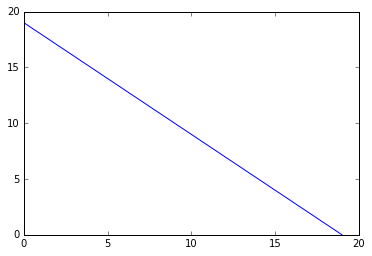

In [3]:
%matplotlib inline
x = DataFrame({'x':np.arange(20), 'y':np.flipud(np.arange(20)), 'z':np.random.randn(20)}) 
z = plt.plot(x['x'], x['y'])
#by assigning we have supressed the matplotlib object printing

matplotlib works by making a figure object, and adding to it. Let's make a 2\*2 subplot and add in some plot types

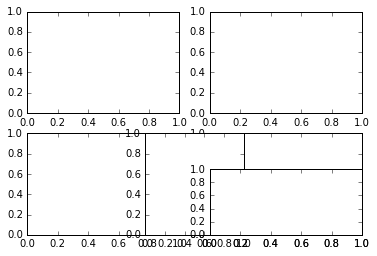

In [18]:
figure = plt.figure()
ax1 = figure.add_subplot(2, 2, 1)
ax2 = figure.add_subplot(2, 2, 2)
ax3 = figure.add_subplot(2, 2, 3)
ax4 = figure.add_subplot(2, 2, 4)
ax5 = figure.add_subplot(2, 3, 5)
ax6 = figure.add_subplot(3, 2, 6)

plt.show(figure)

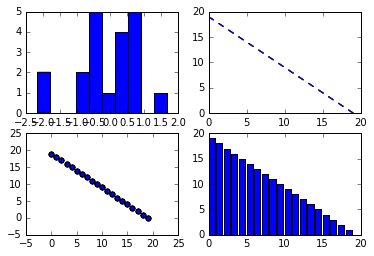

In [13]:
ax1.hist(x['z'])
ax2.plot(x['x'], x['y'], '--')
ax3.scatter(x['x'], x['y'])
ax4.bar(x['x'], x['y'])
figure

### Anatomy of a plot

Matplotlib stores plots as a figure object, which contains subplots (or axes), which contain titles, x and y values and the actual plot. We can add on multiple plot types on one axis. We can add them on one by one:

 (0.5, 4.5),

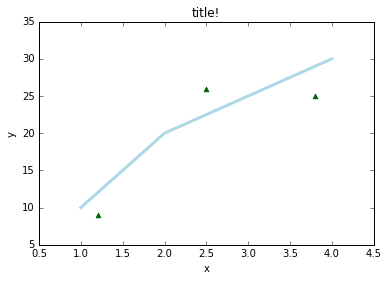

In [22]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3);
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^');
ax.set(xlim = [0.5, 4.5], title = 'title!', ylabel = 'y', xlabel = 'x');
#here we would use plt.savefig('figpath.png', dpi=400)

We can use [multiple colours](http://matplotlib.org/mpl_examples/color/named_colors.hires.png),
[markers](http://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html) and [line types](http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html).

For mutliple lines, we can use recurring triples of arguments:

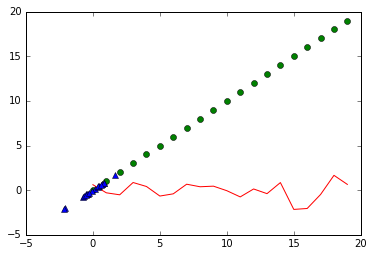

In [23]:
plt.plot(x['y'], x['z'], 'r-', x['x'], x['x'], 'go', x['z'], x['z'], 'b^')

This works for wide data, how about long data?

In [24]:
dat = DataFrame({'x':np.random.randn(20),'y':[1,2]*10, 'z':[val for val in range(10) for _ in (0, 1)]})
dat

,x,y,z
0,0.138322,1,0
1,0.414484,2,0
2,-0.157848,1,1
3,0.161870,2,1
4,0.608472,1,2
5,-0.023065,2,2
6,1.377439,1,3
7,-1.808586,2,3
8,1.217957,1,4
9,-0.242735,2,4


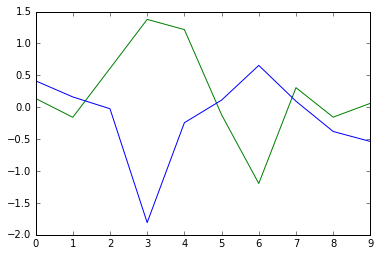

In [26]:
colors = ['green', 'blue']
for i in range(len(np.unique(dat['y']))):
    plt.plot(dat['z'][dat['y']==np.unique(dat['y'])[i]],
             dat['x'][dat['y']==np.unique(dat['y'])[i]], color = colors[i])

Luckily, we have pandas and groupby:

y
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
dtype: object

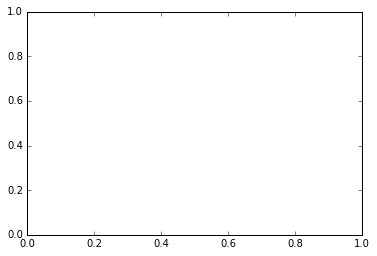

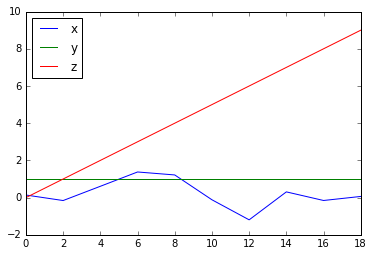

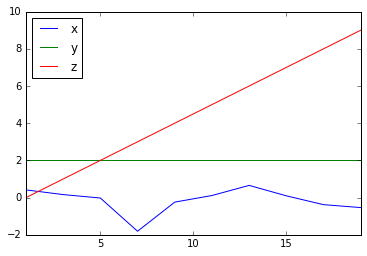

In [32]:
 fig, ax = plt.subplots(1,1); dat.groupby("y").plot(x="z", y="x", ax=ax)

or we could pivot using pivot tables, so that each level gets its own column:

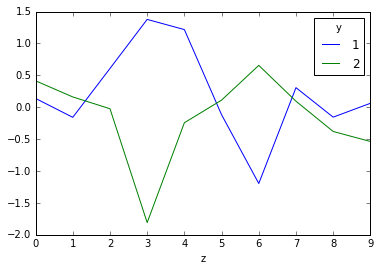

In [28]:
pivoted = pd.pivot_table(dat, values='x', columns='y', index = 'z')
pivoted.plot()

We can also use boxplots:

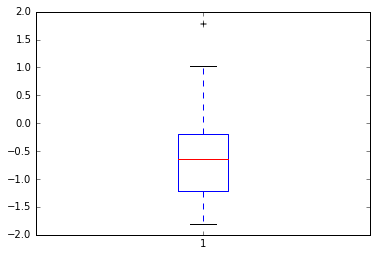

In [29]:
x = DataFrame({'x':np.random.randn(20)})
plt.boxplot(x['x']);

but it doesn't look too nice....

### Seaborn

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) is an extension to matplotlib, which adds a more modern looking theme, better colour palettes as well as built in plots for several common statistical methods

Let's redo our boxplot


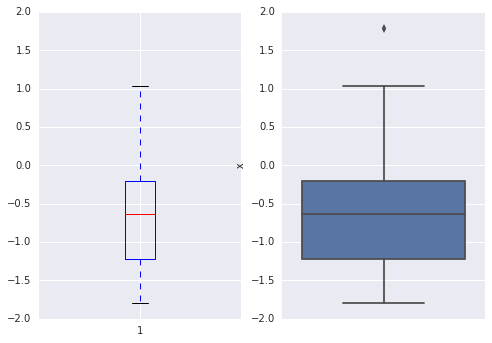

In [34]:
import seaborn as sns
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(x['x'])
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.boxplot(x['x'], orient = 'v')

We can see a couple of things - the seaborn plot looks nicer, and the boxplot has a grid and different axes!

Importing seaborn by default changes the parameters in matplotlib, so beware.

Let's load some new data and try out a violin plot:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


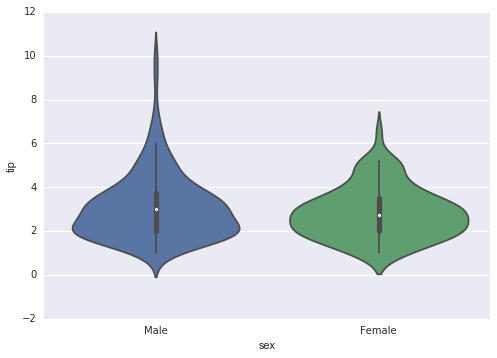

In [35]:
tips = sns.load_dataset("tips")

print(tips.head())

sns.violinplot(x = 'sex', y = 'tip', data = tips);

For more info on seaborn and its plots and arguments, see the [online help](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot).

Plotting is an example where it is best to learn as you go - use google, stackoverflow and the docs to figure out what you want to do!

E.g. How do I move the above axis label up to the origin?

### Linear Regression

Seaborn has a nice set of built in plots to carry out linear regression. Let's use the tips data to continue on: 

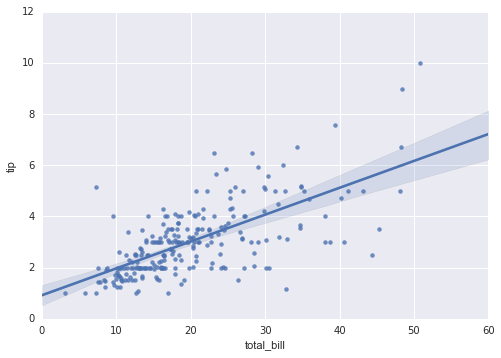

In [36]:
sns.regplot("total_bill", "tip", tips);

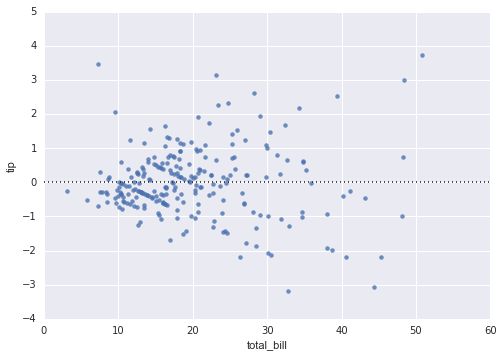

In [37]:
sns.residplot("total_bill", "tip", tips);

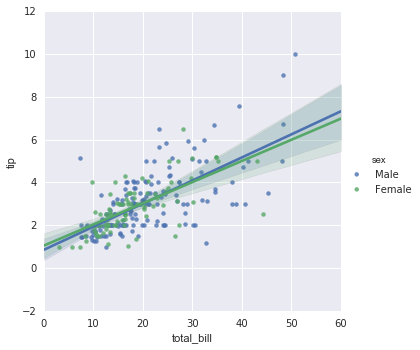

In [38]:
sns.lmplot("total_bill", "tip", hue = 'sex', data = tips);

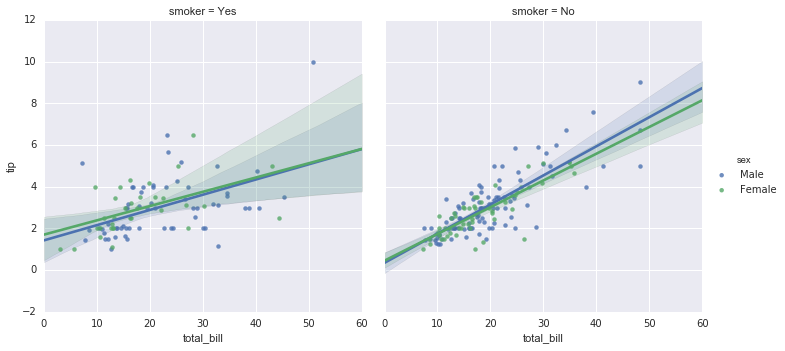

In [39]:
sns.lmplot("total_bill", "tip", hue = 'sex', col = 'smoker', data = tips);

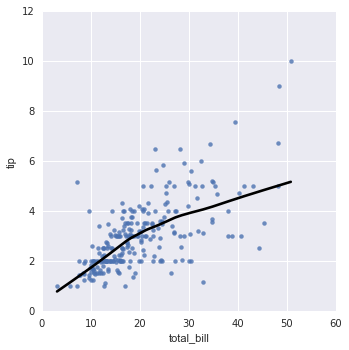

In [40]:
sns.lmplot("total_bill", "tip", tips, lowess=True, line_kws={"color": 'black'});

Great! but how do we get the parameters? Turns out, we can't from seaborn.......

### Linear Regression

Again, there is no built in linear model method in Python. There are several competing methods - we will cover a couple today, and then dive into scikit-learn in a later lesson.

In [41]:
#using scipy.stats:
from scipy import stats
x = DataFrame({'x':np.random.randn(20), 'y':np.random.randn(20)})
slope, intercept, r_value, p_value, std_err = stats.linregress(x['x'],x['y'])
print(slope, intercept, r_value, p_value, std_err)
#using numpy polyfit:
slope, intercept = np.polyfit(x['x'], x['y'], 1) 
print(slope, intercept)

0.103095005253 -0.139495963687 0.112608531824 0.63643975094 0.214416841218
0.103095005253 -0.139495963687


Not so great - we might want a built in plotter, or more data about the actual regression. We might also want to use glms later down the road.

statsmodels is a package made by Wes McKinney originally, and continues to be maintained. It has methods for linear regression, as well as glms, mixed effect models and lots of other useful statistics. See the [statsmodels website](http://statsmodels.sourceforge.net/devel/index.html) for more information.

For detailed examples of linear regression, see the [regression help pages](http://statsmodels.sourceforge.net/devel/regression.html)

In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#we can use R style formulas:
results = smf.ols('y ~ x', data=x).fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                    0.2312
Date:                Mon, 21 Mar 2016   Prob (F-statistic):              0.636
Time:                        13:59:41   Log-Likelihood:                -25.291
No. Observations:                  20   AIC:                             54.58
Df Residuals:                      18   BIC:                             56.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1395      0.202     -0.691      0.4

We can also use multiple and categorical variables:

In [44]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [45]:
#+ adds more variables
#the output shows an intercept for categorical variables
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 21 Mar 2016   Prob (F-statistic):           1.07e-05
Time:                        14:03:48   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [47]:
#using -1 we can remove an intercept
#using a star we give the interaction and individual terms used
res2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()
print(res2.params)

Literacy           0.427386
Wealth             1.080987
Literacy:Wealth   -0.013609
dtype: float64


We can also use the machine learning library, [scikit-learn](http://scikit-learn.org/stable/). Scikit learn will be covered in more detail in a later class, but for now we can see that it has a wide range of [regression models built in](http://scikit-learn.org/stable/modules/linear_model.html). The standard criticism of scikit learn is that it has a million different ways of doing an analysis and very little guidance as to which version to use, and why.

### Two way ANOVA example

In [48]:
moore = sm.datasets.get_rdataset("Moore", "car", cache=True).data
moore = moore.rename(columns={"partner.status" : "partner_status"})
moore.head()

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [50]:
moore_lm = smf.ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',data=moore).fit()
print(sm.stats.anova_lm(moore_lm, typ=2))

                                              sum_sq  df          F    PR(>F)
C(fcategory, Sum)                          11.614700   2   0.276958  0.759564
C(partner_status, Sum)                    212.213778   1  10.120692  0.002874
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2   4.184623  0.022572
Residual                                  817.763961  39        NaN       NaN


### Summary

That's it for today. We have covered matplotlib and seaborn plotting, as well as a number of methods of carrying out a linear regression.

Next week we will cover generalized linear models, linear optimization and clustering.

In [61]:
sns.factorplot(x="fcategory", y="conformity",hue="partner_status", data=moore, palette="YlGnBu_d", 
                 size=6,aspect=75)
%matplotlib inline
